In [1]:
%matplotlib notebook

import math
import numpy as np
import matplotlib.pyplot as plt
import sympy

import geometrik.threed as g3d

from goto.globe.plot import GlobePlotMpl

In [ ]:
u = sympy.symbols('u')

Ex = g3d.Vector(1, 0, 0)
Ey = g3d.Vector(0, 1, 0)
Ez = g3d.Vector(0, 0, 1)

L'idée est de prendre le plan equatorial et de l'incliner d'un angle $\theta$ autour de l'axe $O_x$. Ce plan incliné est défini par son vecteur normal, le vecteur $N_z$

In [ ]:
theta, psi = sympy.symbols('theta psi')

Nz = g3d.Vector(0, -sympy.sin(theta), sympy.cos(theta))
Ny = g3d.Vector(0, sympy.cos(theta), sympy.sin(theta))
Nx = g3d.Vector(1, 0, 0)

Le vecteur $U_x$, le centre du cercle tangeant, est défini par l'angle $\psi$ qu'il fait avec l'axe $O_x$

In [ ]:
Ux = g3d.Vector(sympy.cos(psi), sympy.sin(psi), 0)

Le vecteur $M_x$ est la projection du vecteur $U_x$ sur le plan incliné de normale $N_z$

In [ ]:
Mx = Ux.project(Nz)
Mx.x

In [ ]:
Mx.y.simplify()

In [ ]:
Mx.z.simplify()

In [ ]:
Mz = (Ux * Nz) * Nz
Mz.z

In [ ]:
m_val = {'theta': math.pi / 4, 'psi': 0.3}

with GlobePlotMpl() as gpl :
    gpl.add_point(Nx.subs(m_val), 'Nx', 'r')
    gpl.add_point(Ny.subs(m_val), 'Ny', 'g')
    gpl.add_point(Nz.subs(m_val), 'Nz', 'b')
    gpl.add_point(Mz.subs(m_val), 'Mz', 'b')
    gpl.add_great_circle(Nz.subs(m_val), 'k')
    gpl.add_point(Ux.subs(m_val), 'Ux', 'yellow')
    gpl.add_point(Mx.subs(m_val), 'Mx', 'purple')

In [ ]:
Nx.subs({'theta': 0.3})
R = sympy.symbols('R')

$r$ est le rayon du cercle qui a pour centre $U_x$ et qui est tangeant au plan incliné.

In [ ]:
r = Ux.angle_to(Mx).simplify()
r

In [ ]:
r_sol = sympy.solve(r - R, theta)
r_sol

In [ ]:
r_sol[0]

In [ ]:
r_sol[1]

In [ ]:
r_sol[2]

In [ ]:
r_sol[3].simplify()

In [ ]:
theta_lst = [float(r_sol[i].subs({'psi': 0.3, 'R': 0.1})) for i in range(4)]
theta_lst

In [ ]:
C = g3d.Vector.compose(Ex, Ey, 0.3)

Pp = g3d.Vector(0, -sympy.sin(theta), sympy.cos(theta)).subs({'theta': theta_lst[2]})
Pn = g3d.Vector(0, -sympy.sin(theta), sympy.cos(theta)).subs({'theta': theta_lst[3]})
Mp = C.project(Pp).normalized()
Mn = C.project(Pn).normalized()

with GlobePlotMpl() as gpl :
    gpl.add_point(Ex, 'Ex', 'r')
    gpl.add_point(Ey, 'Ey', 'g')
    gpl.add_point(Ez, 'Ez', 'b')
    gpl.add_point(Mp, 'Mp', 'cyan')
    gpl.add_point(Mn, 'Mn', 'cyan')

    gpl.add_point(g3d.Vector(sympy.cos(psi), sympy.sin(psi), 0).subs({'psi': 0.3}), 'C', 'orange')
    gpl.add_circle(C, 0.1, 'orange')    
    gpl.add_great_circle(Pp, 'magenta')
    gpl.add_great_circle(Pn, 'magenta')


In [ ]:
r_lst = list()
t_lst = np.linspace(0.0, math.pi/2, 100)
u_lst = list()
k = math.pi / 3
for t in t_lst :
    r_lst.append(math.acos(math.sqrt(1 - (math.sin(k)**2 * math.sin(t)**2))))
    u_lst.append(math.sin(t)* k)

plt.figure()
plt.plot(t_lst, r_lst)
plt.plot(t_lst, u_lst)
plt.show()

La question se pose maintenant de manière plus générale : étant donné deux points A et B, et un rayon de virage donné, trouver les 4 segments qui forment les tangentes à ces cercles.

In [ ]:
Ax, Ay, Az = sympy.symbols('Ax Ay Az')
A = g3d.Vector(Ax, Ay, Az)

In [ ]:
Bx, By, Bz = sympy.symbols('Bx By Bz')
B = g3d.Vector(Bx, By, Bz)

Cx est le point exactement au milieu des deux cercles, comme ils sont de taille égales, c'est également le point de croisement des tangentes. 

In [ ]:
Cx = (A + B).normalized()
Cx.x

Cz est le vecteur perpendiculaire au plan equatorial contenant A et B, et Cy construit la base Cx, Cy, Cz, directe

In [ ]:
Cz = (A @ B).normalized()
Cz.x

In [ ]:
Cy = (Cz @ Cx)

In [ ]:
Psi_intern = Cx.angle_to(B)

## Cas général

### rappel simple

On rappelle les definitions de :
* $N_z$, le vecteur normal du plan equatorial incliné de $\theta$ autour de $O_x$
* $U_x$, le centre du cercle de centre R
* $M_x$, la projection de $U_x$ sur le plan $N_z$

In [2]:
theta, psi, R = sympy.symbols('theta psi R')

In [3]:
Nz = g3d.Vector(0, -sympy.sin(theta), sympy.cos(theta))
Ny = g3d.Vector(0, sympy.cos(theta), sympy.sin(theta))
Nx = g3d.Vector(1, 0, 0)
Nz

Vector(0, - \sin{\left(\theta \right)}, \cos{\left(\theta \right)})

In [4]:
Ux = g3d.Vector(sympy.cos(psi), sympy.sin(psi), 0)
Ux

Vector(\cos{\left(\psi \right)}, \sin{\left(\psi \right)}, 0)

In [14]:
Mx = Ux.project(Nz)
Mx

Vector(\cos{\left(\psi \right)}, - \sin{\left(\psi \right)} \sin^{2}{\left(\theta \right)} + \sin{\left(\psi \right)}, \sin{\left(\psi \right)} \sin{\left(\theta \right)} \cos{\left(\theta \right)})

In [15]:
beta = Ux.angle_to(Mx)

In [16]:
r_equ = Ux.angle_to(Mx).simplify()
r_equ

acos(sqrt(-sin(psi)**2*sin(theta)**2 + 1))

In [28]:
psi_sol = sympy.solve(r_equ - R, psi)
psi_sol[3]

psi_sol = sympy.asin(sympy.sin(R) / sympy.sin(theta)).simplify()
psi_sol

asin(sin(R)/sin(theta))

<IPython.core.display.Javascript object>


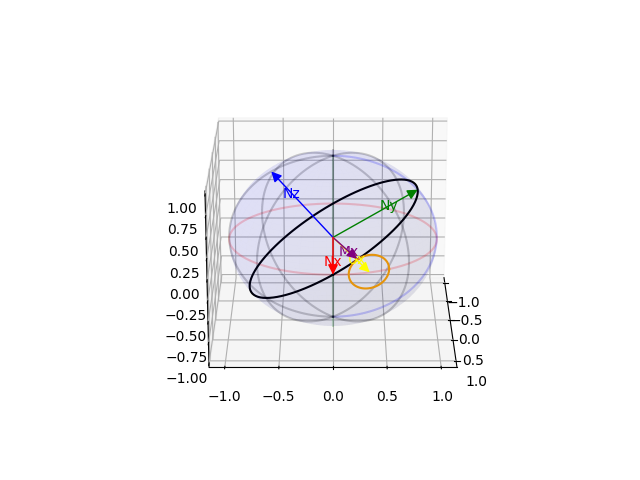

[1.0, 0.0, -0.0] [0.0, 0.8090169943749475, 0.5877852522924731]


In [29]:
m_val = {'theta': math.pi / 5, 'R': 0.2}
m_val['psi'] = float( psi_sol.subs(m_val) )

with GlobePlotMpl() as gpl :
    gpl.add_point(Nx.subs(m_val), 'Nx', 'r')
    gpl.add_point(Ny.subs(m_val), 'Ny', 'g')
    gpl.add_point(Nz.subs(m_val), 'Nz', 'b')
    gpl.add_great_circle(Nz.subs(m_val), 'k')
    gpl.add_circle(Ux.subs(m_val), float(beta.subs(m_val)), 'orange')
    gpl.add_point(Ux.subs(m_val), 'Ux', 'yellow')
    gpl.add_point(Mx.subs(m_val), 'Mx', 'purple')

### étude complète

L'idée est donc de trouver l'expression de $\psi_a$ et $\psi_b$ pour les points $A$ et $B$, centres de cercles de rayon $R_a$ et $R_b$, afin d'avoir la formule de $theta$

In [88]:
theta, psi_a, psi_b, Ra, Rb, alpha = sympy.symbols('theta psi_a psi_b R_a R_b alpha')

In [89]:
Ua = g3d.Vector(sympy.cos(-psi_a), sympy.sin(-psi_a), 0)
Ub = g3d.Vector(sympy.cos(psi_b), sympy.sin(psi_b), 0)

In [90]:
Ma = Ua.project(Nz)
Mb = Ub.project(Nz)

In [91]:
# On reprend la solution simplifiée trouvée précédemment
psi_a_sol = sympy.asin(sympy.sin(Ra) / sympy.sin(theta)).simplify()
psi_b_sol = sympy.asin(sympy.sin(Rb) / sympy.sin(theta)).simplify()

# mais on simplifie d'un cran en posant Pa et Pb
Pa, Pb = sympy.symbols('P_a P_b')

psi_a_sol = sympy.asin(Pa / sympy.sin(theta)).simplify()
psi_b_sol = sympy.asin(Pb / sympy.sin(theta)).simplify()

On peut maintenant calculer theta, sachant que $\psi_a + \psi_b$, la distance entre les deux points, est une donnée du problème

In [92]:
alpha_equ = psi_a_sol + psi_b_sol - alpha
alpha_equ

-alpha + asin(P_a/sin(theta)) + asin(P_b/sin(theta))

In [65]:
alpha_sol = sympy.solve(alpha_equ, theta)

NotImplementedError: multiple generators [asin(P_a/sin(theta)), asin(P_b/sin(theta))]
No algorithms are implemented to solve equation -alpha + asin(P_a/sin(theta)) + asin(P_b/sin(theta))

! can not be solved by sympy, but matlab can

In [ ]:
s3 = Pa**4 - 2 * sympy.cos(2*alpha) * Pa**2 * Pb**2 + Pb**4
s4 = 2 * Pa * Pb**3 * sympy.sin(alpha)**2 * sympy.cos(alpha)
s5 = Pa**2 + Pb**2 * sympy.sin(alpha)**2 - Pb**2

s6 = Pa**4 - Pb**4*sympy.sin(alpha)**2 + Pb**4 - 2*Pa**2*Pb**2 + 3*Pa**2*Pb**2*sympy.sin(alpha)**2 + s4
s7 = (s6 / s3).simplify()

s7

! can not be simplified by sympy, but matlab can

In [66]:
s7 = (Pa + Pb*sympy.cos(alpha))**2/(Pa**2 + 2*sympy.cos(alpha)*Pa*Pb + Pb**2)
s7

(P_a + P_b*cos(alpha))**2/(P_a**2 + 2*P_a*P_b*cos(alpha) + P_b**2)

In [74]:
s8 = s5  / (sympy.sin(alpha) * (Pa - Pb*sympy.cos(alpha)) * sympy.sqrt(s7))
s8

(P_a**2 + P_b**2*sin(alpha)**2 - P_b**2)/(sqrt((P_a + P_b*cos(alpha))**2/(P_a**2 + 2*P_a*P_b*cos(alpha) + P_b**2))*(P_a - P_b*cos(alpha))*sin(alpha))

In [78]:
theta_sol = sympy.asin(s8.simplify().subs({'P_a': sympy.sin(Ra), 'P_b': sympy.sin(Rb)}))
theta_sol.simplify()

asin((sin(R_a)/sin(alpha) + sin(R_b)/tan(alpha))/sqrt((sin(R_a) + sin(R_b)*cos(alpha))**2/(sin(R_a)**2 + 2*sin(R_a)*sin(R_b)*cos(alpha) + sin(R_b)**2)))

In [86]:
m_val = {'R_a': 0.2, 'R_b': 0.3, 'alpha': 0.9}
m_val['theta'] = float(theta_sol.subs(m_val))
m_val['psi_a'] = float(sympy.asin(sympy.sin(Ra) / sympy.sin(theta)).subs(m_val))
m_val['psi_b'] = float(sympy.asin(sympy.sin(Rb) / sympy.sin(theta)).subs(m_val))
print(m_val)

{'R_a': 0.2, 'R_b': 0.3, 'alpha': 0.9, 'theta': 0.6072592898721483, 'psi_a': 0.3556125505989775, 'psi_b': 0.5443874494010223}


<IPython.core.display.Javascript object>


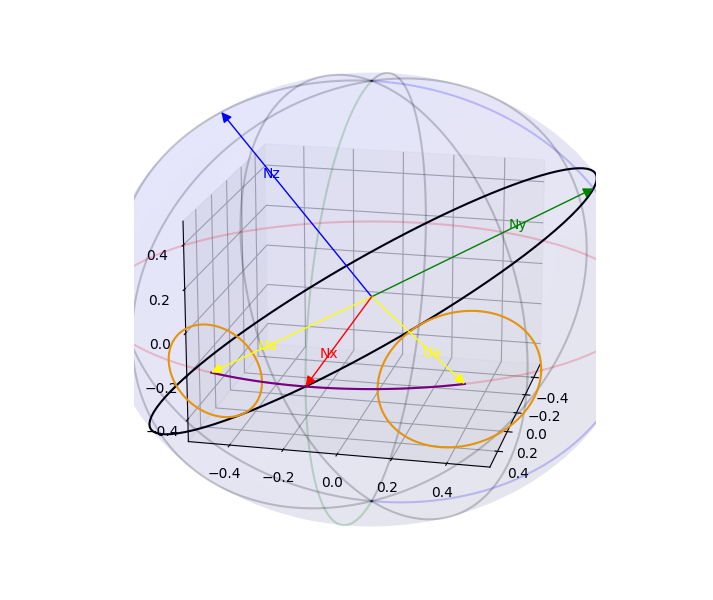

[1.0, 0.0, -0.0] [0.0, 0.8212150011418681, 0.5706188937456957]


In [98]:
with GlobePlotMpl() as gpl :
    gpl.add_point(Nx.subs(m_val), 'Nx', 'r')
    gpl.add_point(Ny.subs(m_val), 'Ny', 'g')
    gpl.add_point(Nz.subs(m_val), 'Nz', 'b')
    gpl.add_great_circle(Nz.subs(m_val), 'k')
    gpl.add_point(Ua.subs(m_val), 'Ua', 'yellow')
    gpl.add_point(Ub.subs(m_val), 'Ua', 'yellow')
    gpl.add_circle(Ua.subs(m_val), float(Ra.subs(m_val)), 'orange')
    gpl.add_circle(Ub.subs(m_val), float(Rb.subs(m_val)), 'orange')
    gpl.add_line(Ua.subs(m_val), Ub.subs(m_val), 'purple')